In [6]:
import EntropyHub as eh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

1. Raw data visulization

In [7]:
abnormal = pd.read_csv("ptbdb_abnormal.csv", header = None) 
normal = pd.read_csv("ptbdb_normal.csv", header = None)

abnormal = abnormal.drop([187], axis=1)
normal = normal.drop([187], axis=1)

abnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(682890,)


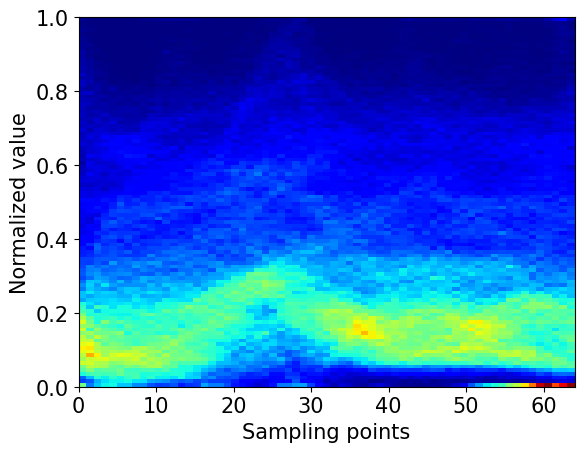

In [8]:
flatten_ab_y = (abnormal.values)
flatten_ab_y  = flatten_ab_y[:,5:70].flatten()

print(flatten_ab_y.shape)

ab_x=np.arange(0,65)
ab_x = np.tile(ab_x, abnormal.shape[0])

plt.hist2d(ab_x, flatten_ab_y, bins = (65,100), cmap = plt.cm.jet) 
plt.xlabel('Sampling points')
plt.ylabel('Normalized value')
plt.rcParams.update({'font.size': 15})
# plt.savefig('plot_original_data_abnormal_all.png', bbox_inches="tight", dpi=700)
plt.show()

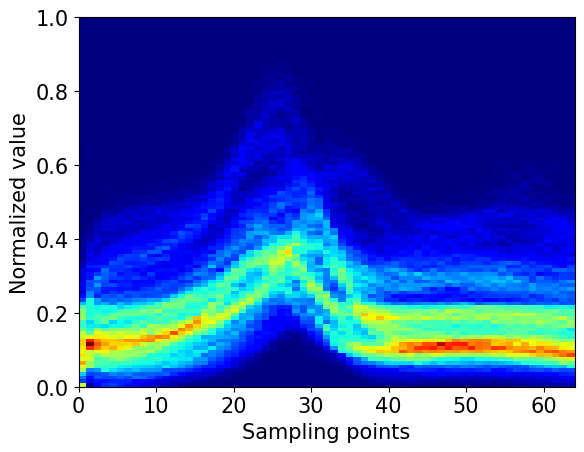

In [9]:
flatten_norm_y = normal.values
flatten_norm_y  = flatten_norm_y[:,5:70].flatten()

norm_x=np.arange(0,65)
norm_x = np.tile(norm_x, normal.shape[0])

plt.hist2d(norm_x,flatten_norm_y, bins=(65,100), cmap=plt.cm.jet)
plt.xlabel('Sampling points')
plt.ylabel('Normalized value')
plt.rcParams.update({'font.size': 15})
# plt.savefig('plot_original_data_normal_all.png', bbox_inches="tight", dpi=700)
plt.show()

2. Generate entropy features

In [10]:
def generate_entropy(dataset_heart_participant):

    xx = np.array(dataset_heart_participant.iloc[:,1:])
    # Approximate entropy
    approximate_entropy, _ = eh.ApEn(xx)
    # Sample entropy, note
    sample_entrpy, _, _ = eh.SampEn(xx)
    # Fuzzy entropy, note
    fuzzy_entropy, _, _ = eh.FuzzEn(xx)
    # Permutation entropy,note
    permutation_entropy, _, _ = eh.PermEn(xx)
    # Spectral band Entropy (we don't know the edge frequencies)
    spectral_entropy = eh.SpecEn(xx) 
    # Dispersion Entropy, note
    dispersion_entropy,_ = eh.DispEn(xx)
    # Increment entropy
    increment_entropy = eh.IncrEn(xx)
    # Phase entropy, note
    phase_entropy = eh.PhasEn(xx)
    # Slope entropy
    slope_entropy = eh.SlopEn(xx)
    
    # generate entropy dataset
    entropy_feature_participant = [approximate_entropy[-1],sample_entrpy[-1],
                               fuzzy_entropy[-1], permutation_entropy[-1], spectral_entropy[-1],
                               dispersion_entropy, increment_entropy, phase_entropy, slope_entropy[-1]]
    entropy_feature_participant = pd.DataFrame(entropy_feature_participant).T
    entropy_feature_participant.columns = ['approximate_entropy','sample_entrpy','fuzzy_entropy','permutation_entropy',
                                        'spectral_entropy','dispersion_entropy','increment_entropy','phase_entropy',
                                        'slope_entropy']
    return entropy_feature_participant
    
    

In [13]:
DATASET_FILE_ABNORMAL = os.path.join('ptbdb_abnormal.csv') 
dataset_heart_abnormal = pd.read_csv(DATASET_FILE_ABNORMAL)
dataset_heart_abnormal = dataset_heart_abnormal.iloc[:,:-1].reset_index()

DATASET_FILE_NORMAL = os.path.join('ptbdb_normal.csv') 
dataset_heart_normal = pd.read_csv(DATASET_FILE_NORMAL)
dataset_heart_normal = dataset_heart_normal.iloc[:,:-1].reset_index()

In [14]:
dataset_heart_abnormal_entropy = dataset_heart_abnormal.groupby('index').apply(generate_entropy).reset_index().iloc[:,2:]
dataset_heart_abnormal_entropy['label'] = 0
dataset_heart_abnormal_entropy.to_csv('dataset_abnormal_entropy.csv') 

dataset_heart_normal_entropy = dataset_heart_normal.groupby('index').apply(generate_entropy).reset_index().iloc[:,2:]
dataset_heart_normal_entropy['label'] = 0
dataset_heart_normal_entropy.to_csv('dataset_normal_entropy.csv') 

In [15]:
entropy_normal = pd.read_csv('dataset_abnormal_entropy.csv', usecols=['approximate_entropy','sample_entrpy','fuzzy_entropy','permutation_entropy','spectral_entropy','dispersion_entropy','increment_entropy','phase_entropy','slope_entropy','label']).reset_index(drop=True)
entropy_normal['label'] = 0
entropy_abnormal = pd.read_csv('dataset_normal_entropy.csv', usecols=['approximate_entropy','sample_entrpy','fuzzy_entropy','permutation_entropy','spectral_entropy','dispersion_entropy','increment_entropy','phase_entropy','slope_entropy','label']).reset_index(drop=True)
entropy_abnormal['label'] = 1
dataset_entropy = pd.concat([entropy_normal, entropy_abnormal],axis=0).reset_index(drop=True)
dataset_entropy.head()

,approximate_entropy,sample_entrpy,fuzzy_entropy,permutation_entropy,spectral_entropy,dispersion_entropy,increment_entropy,phase_entropy,slope_entropy,label
0,0.492588,0.340446,0.021454,0.975761,0.532653,1.467709,4.156219,0.871765,0.374015,0
1,0.152549,0.049559,0.023901,0.823812,0.363701,0.802964,3.115575,0.868714,0.327461,0
2,0.229232,0.073582,0.027334,0.815511,0.410866,1.261151,3.235758,0.884751,0.355937,0
3,0.196923,0.024438,0.007077,0.719772,0.616643,0.965312,2.233150,0.788908,0.226561,0
4,0.195498,0.049811,0.025497,0.780067,0.494233,1.226413,3.017925,0.905744,0.349555,0


3. Feature selection

In [16]:
# determine the mutual information
X_train = dataset_entropy.iloc[:,:-1]
y_train = dataset_entropy.iloc[:, -1]
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.07149532, 0.05080608, 0.05733839, 0.02239329, 0.01387138,
       0.08486427, 0.02964954, 0.12245527, 0.05786061])

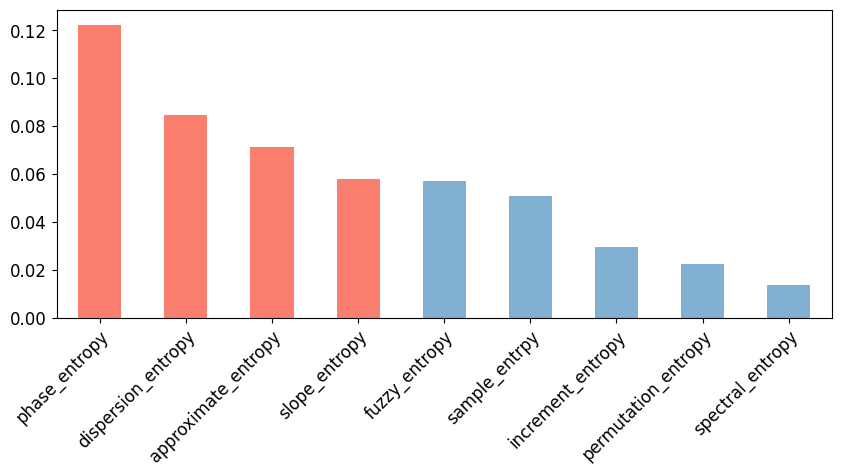

In [17]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 4),color = ['#FA7F6F','#FA7F6F','#FA7F6F','#FA7F6F','#82B0D2','#82B0D2','#82B0D2','#82B0D2','#82B0D2'])
plt.xticks(rotation=45,fontsize=12,rotation_mode='anchor',ha="right")
plt.yticks(rotation=0,fontsize=12)
plt.savefig('EntropySelection2.png', bbox_inches="tight", dpi=700)

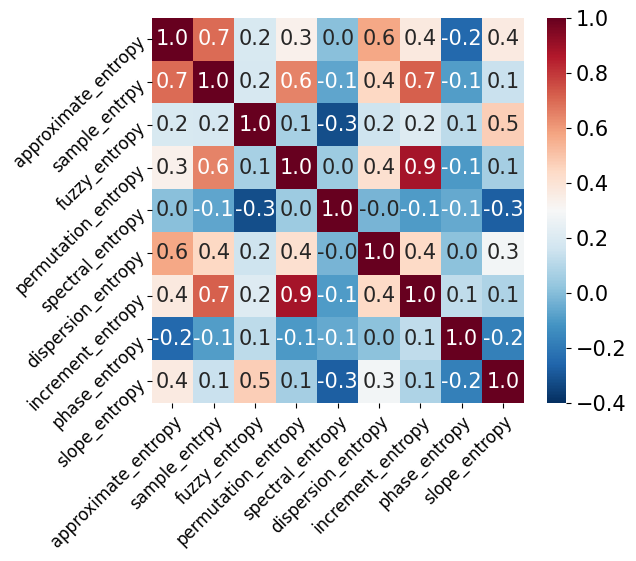

In [18]:
cor = X_train.corr()
plt.figure(figsize=(6,5))
g = sns.heatmap(cor, cmap="RdBu_r",annot=True, vmin=-0.4, vmax=1, fmt='.1f')
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12, rotation_mode='anchor',ha="right")
g.set_yticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12, rotation_mode='anchor',ha="right")
plt.savefig('EntropySelection1.png', bbox_inches="tight", dpi=700)

4. Save entropy features

In [19]:
dataset_entropy = pd.DataFrame(dataset_entropy, columns=['phase_entropy','dispersion_entropy','approximate_entropy','fuzzy_entropy','label'])
dataset_entropy.to_csv('dataset_all_entropy.csv')
dataset_entropy

,phase_entropy,dispersion_entropy,approximate_entropy,fuzzy_entropy,label
0,0.871765,1.467709,0.492588,0.021454,0
1,0.868714,0.802964,0.152549,0.023901,0
2,0.884751,1.261151,0.229232,0.027334,0
3,0.788908,0.965312,0.196923,0.007077,0
4,0.905744,1.226413,0.195498,0.025497,0
...,...,...,...,...,...
14545,0.839110,1.278987,0.361874,0.027600,1
14546,0.900999,1.150330,0.144654,0.026512,1
14547,0.871264,1.236292,0.288067,0.031721,1
14548,0.902139,1.267327,0.142997,0.021764,1
